In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [340]:
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [341]:
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [342]:
df=pd.concat([df_train,df_test])
df.shape

(783667, 12)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [344]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [345]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [346]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Handaling Categorical values

In [347]:
df.City_Category=df.City_Category.map({'A':1,'B':2,'C':3})
df.City_Category.value_counts()

City_Category
2    329739
3    243684
1    210244
Name: count, dtype: int64

In [348]:
df.Gender=df.Gender.map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,3,4+,0,8,NaN,NaN,7969.0


In [349]:
df.Age.value_counts()
#df.groupby(df.Age).size()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [350]:
df.Age=df.Age.map({'0-17':1,
                   '18-25':2,
                   '26-35':3,
                   '36-45':4,
                   '46-50':5,
                   '51-55':6,
                   '55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [351]:
df_city=pd.get_dummies(df.City_Category,drop_first=True)

In [352]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,2,3
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0,False,True


In [353]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,2,3
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0,False,True


### Handling missing values

In [354]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
2                                  0
3                                  0
dtype: int64

In [355]:
df.Product_Category_2.value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [356]:
#for Product_Category_3,Product_Category_2 we handle the missing the values,purchace is from test data
#Best way to fill null values is using mode

df.Product_Category_3=df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])
df.Product_Category_2=df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
2                                  0
3                                  0
dtype: int64

In [357]:
#convert objects into integers
#df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

### Visualization

### no of purchace by men and women

<Axes: xlabel='Age', ylabel='Purchase'>

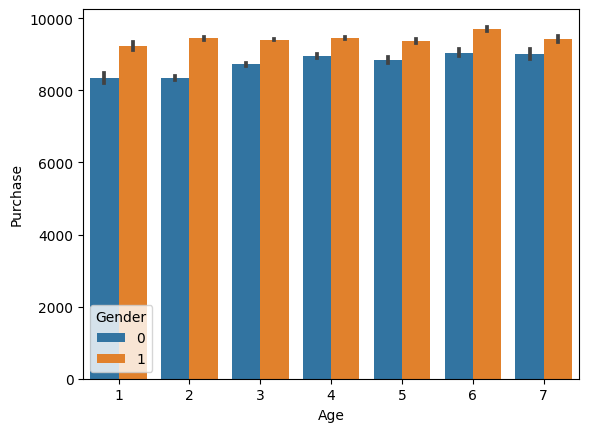

In [359]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

### no of purchace with occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

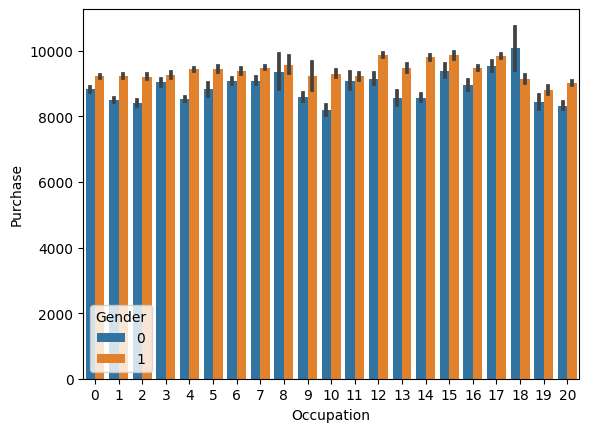

In [360]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

In [361]:
df_test=df[df.Purchase.isnull()]
df_train=df[~df.Purchase.isnull()]


### Freature Scalling

In [362]:
X=df_train.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,2,3
0,P00069042,0,1,10,1,0,3,8.0,16.0,False,False
1,P00248942,0,1,10,1,0,1,6.0,14.0,False,False
2,P00087842,0,1,10,1,0,12,8.0,16.0,False,False
3,P00085442,0,1,10,1,0,12,14.0,16.0,False,False
4,P00285442,1,7,16,3,0,8,8.0,16.0,False,True


In [363]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [364]:
X.drop('Product_ID',axis=1,inplace=True)



In [365]:
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,2,3
0,0,1,10,1,0,3,8.0,16.0,False,False
1,0,1,10,1,0,1,6.0,14.0,False,False
2,0,1,10,1,0,12,8.0,16.0,False,False
3,0,1,10,1,0,12,14.0,16.0,False,False
4,1,7,16,3,0,8,8.0,16.0,False,True


In [366]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.3,
    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)